In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory


# Any results you write to the current directory are saved as output.

In [ ]:
df = pd.read_csv('/content/googleplaystore.csv')

In [ ]:
#Cleaning the dataset
#First look dataset Column
df.info()
#Lets Check out the nul value and dealing with them
df.isnull().sum()
# Clearly 'Rating' column has most null value and it is our the dependent variable.
# The best way to fill missing values might be using the median instead of mean.
df['Rating'] = df['Rating'].fillna(df['Rating'].median())

# convert reviews to numeric
df['Reviews'] = pd.to_numeric(df.Reviews, errors = 'coerce')

In [ ]:
#Let's look at the apps in the data 
df.App.value_counts().head(20)

In [ ]:
# Let's check out the App categories
df.Category.value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [ ]:
#Now remove the catagories 1.9 which is irrelevant for our model
df[df['Category'] == '1.9']
df = df.drop([10472])

In [ ]:
#Drops other duplicate entries keeping the App with the highest reviews
df.drop_duplicates('App', keep = 'last', inplace = True)
df.App.value_counts()

Photo Editor & Candy Camera & Grid & ScrapBook      1
Rockstars of Ooo                                    1
Angelo Rules - Crazy day                            1
Flipped Out! - Powerpuff Girls                      1
Adventure Time Game Wizard                          1
                                                   ..
Mopar Drag N Brag                                   1
Read Unlimitedly! Kids'n Books                      1
Dark Infusion Substratum Theme for Android N & O    1
Fantastic Chefs: Match 'n Cook                      1
iHoroscope - 2018 Daily Horoscope & Astrology       1
Name: App, Length: 9659, dtype: int64

In [ ]:
#lets Deal with the Size of Apps
df.Size.value_counts()

Varies with device    1227
11M                    182
12M                    181
13M                    177
14M                    177
                      ... 
429k                     1
200k                     1
460k                     1
728k                     1
619k                     1
Name: Size, Length: 461, dtype: int64

In [ ]:
#Now Convert non nemurice value to 'NaN' value
df['Size'][df['Size' ] == 'Varies with devices'] = np.nan

In [ ]:
#Now Convert M with Million and K with Thousand
df['Size'] = df.Size.str.replace('M', 'e6')
df['Size'] = df.Size.str.replace('K', 'e3')

In [ ]:
#Now Convert to the nemuric value
df['Size'] = pd.to_numeric(df['Size'], errors = 'coerce')
#Replace the "NaN' Value with Mean 
df['Size'] = df['Size'].fillna(df['Size'].mean())

In [ ]:
df.Installs.value_counts()

1,000,000+        1419
100,000+          1114
10,000+           1031
10,000,000+        933
1,000+             887
100+               709
5,000,000+         607
500,000+           504
50,000+            469
5,000+             468
10+                385
500+               328
50,000,000+        204
50+                204
100,000,000+       189
5+                  82
1+                  67
500,000,000+        24
1,000,000,000+      20
0+                  14
0                    1
Name: Installs, dtype: int64

In [ ]:
#Now replace '+' and ',' signs and convert to numeric value
df['Installs'] = df.Installs.str.replace('+', '')
df['Installs'] = df.Installs.str.replace(',', '')

In [ ]:
#Now Convert to the nemuric value
df['Installs'] = pd.to_numeric(df['Installs'], errors = 'coerce')

In [ ]:
#Now Build the Machine Learning Model
#Now Lets take matrix of features
x = df.iloc[:,3:6].values
y = df.iloc[:,2].values

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
#Fitting Random Forest Regression to tranning set
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 200, random_state = 0)
regressor.fit(x_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=0)

In [ ]:
y_pred = regressor.predict(x_test)

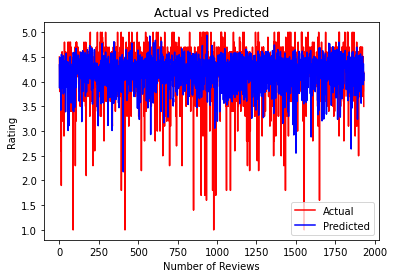

In [ ]:
#Visualising the Predicted Result
import matplotlib.pyplot as plt
plt.plot(y_test, color = 'red', label = 'Actual')
plt.plot(y_pred, color = 'blue', label = 'Predicted')
plt.xlabel('Number of Reviews')
plt.ylabel('Rating')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()